## Initialization

In [46]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})

Define some constants and parameters

In [47]:
mu0 = 4e-7*np.pi
c0 = 299792458
eps0 = 1/(c0**2*mu0)
gamma = 1e12
gamma_d = 5e11/gamma
N=601
Temp = 400
Temp_p = 400
hbar = 1.05457182e-34
hbar_normal = hbar/gamma
kb = 1.380649e-23
kb_normal = kb/(gamma**2)
#Lc is the total length of the 1d photonic lattice
Lc = 1.2e-4
#Lr is the total length of the system including the vaccum part.
Lr = 0.012/10
#Np is the number of periods of the photonic lattices.
Np = 12
#lp is the length of one period.
lp = Lc/Np

In [48]:
def Swk_gen(omega_l, Omega_k, G_in):
    nw = len(Omega_k)
    Swk = []
    for omega in omega_l:
        Swk.append(Omega_k*G_in*gamma_d/(gamma_d**2 + (omega*np.ones(nw) - Omega_k)**2))
    return np.array(Swk)

In [49]:
def S_io(omega_l, Omega_k, G_in, G_out, Nk):
    s_in = []
    s_out = []
    Swk_in = Swk_gen(omega_l, Omega_k, G_in)
    Swk_out = Swk_gen(omega_l, Omega_k, G_out)
    for i, omega in enumerate(omega_l):
        s_in.append(np.sum(Swk_in[i]*Nk))
    for i, omega in enumerate(omega_l):
        s_out.append(np.sum(Swk_out[i]*Nk))
    return np.array(s_in), np.array(s_out)                    

In [50]:
def Nk_load(emode_f, photon_f):
    emodes = np.load(emode_f)
    ks = emodes["ks"]
    G_in = emodes["G_in"]
    G_out = emodes["G_out"]
    G_out_ep = emodes["G_out_ep"]
    Omega_k = ks/lp*c0/gamma
    nit = np.load(photon_f)
    Nk = nit[nit.files[2]]
    if Nk.ndim != 1:
        Nk = Nk[-1]
    return Omega_k, G_in, G_out, G_out_ep, Nk

In [51]:
def fa(omega_n,T):
    return 1/(1+np.exp(-hbar_normal*omega_n/(kb_normal*T)))
def fb(omega_n,T):
    return np.exp(-hbar_normal*omega_n/(kb_normal*T))/(1+np.exp(-hbar_normal*omega_n/(kb_normal*T)))             

Define the range of the scanning of the normalized $\omega$

In [52]:
omega_l = np.linspace(1e13,5e14,5000)/gamma

## $\gamma_c$ dependence (active case)

### $N_a$ distributions

In [56]:
ni_t1_1= np.load('Photon_n_0_6pi_Tp1_n50_kry_sp.npz')
ni_t1_2 = np.load('Photon_n_0_6pi_Tp1_n50_kry_sp_gc8e+09.npz')
ni_t001_1 = np.load('Photon_n_0_6pi_Tp001_n50_kry_sp_gc1e+09.npz')
ni_t001_2 = np.load('Photon_n_0_6pi_Tp001_n50_kry_sp_gc8e+09.npz')
ni_t001_3 = np.load('Photon_n_0_6pi_Tp0.01_n1000_gr1e+10_gc3e+12.npz')
ni_t001_4 = np.load('Photon_n_0_6pi_Tp0.01_n1000_gr1e+10_gc1e+13.npz')
#ni_t04_1 = np.load('Photon_n_0_6pi_Tp04_n50_kry_sp.npz')
#ni_t04_2 = np.load('Photon_n_0_6pi_Tp04_n50_kry_sp_gc8e+09.npz')
ni_t04_3 = np.load('Photon_n_0_6pi_Tp0.4_n1000_gr1e+10_gc3e+12.npz')
ni_t04_4 = np.load('Photon_n_0_6pi_Tp0.4_n1000_gr1e+10_gc1e+13.npz')
na_t1_1 = ni_t1_1[ni_t1_1.files[0]]
na_t1_2 = ni_t1_2[ni_t1_2.files[0]]
na_t001_1 = ni_t001_1[ni_t001_1.files[0]]
na_t001_2 = ni_t001_2[ni_t001_2.files[0]]
na_t001_3 = ni_t001_3[ni_t001_3.files[0]]
na_t001_4 = ni_t001_4[ni_t001_4.files[0]]
#na_t04_1 = ni_t001_1[ni_t04_1.files[0]]
#na_t04_2 = ni_t001_2[ni_t04_2.files[0]]
na_t04_3 = ni_t04_3[ni_t04_3.files[0]]
na_t04_4 = ni_t04_4[ni_t04_4.files[0]]

In [57]:
nn = 1000
omega_n = np.linspace(0.1,5.2e14,nn)/gamma
fbn = fb(omega_n,Temp)
fan = fa(omega_n,Temp)

In [58]:
na_t001_1_e = np.array([])
na_t001_2_e = np.array([])
na_t1_1_e = np.array([])
for na in na_t001_1:
    na_t001_1_e = np.append(na_t001_1_e, [na]*20)
for na in na_t001_2:
    na_t001_2_e = np.append(na_t001_2_e, [na]*20)    
for na in na_t1_1:
    na_t1_1_e = np.append(na_t1_1_e, [na]*20)    

Text(0.5, 1.0, '$N_a$ for different $\\gamma_c$ ($T_p=0.01$)')

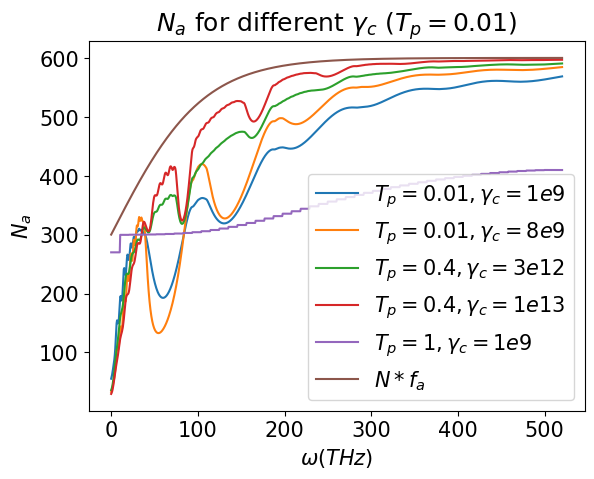

In [59]:
plt.plot(omega_n, na_t001_3, label = '$T_p=0.01, \gamma_c=1e9$')
plt.plot(omega_n, na_t001_4, label = '$T_p=0.01, \gamma_c=8e9$')
plt.plot(omega_n, na_t04_3, label = '$T_p=0.4, \gamma_c=3e12$')
plt.plot(omega_n, na_t04_4, label = '$T_p=0.4, \gamma_c=1e13$')
plt.plot(omega_n, na_t1_1_e, label = '$T_p = 1, \gamma_c=1e9$')
plt.plot(omega_n, N*fan, label = '$N*f_a$')
plt.legend()
plt.xlabel('$\omega(THz)$')
plt.ylabel('$N_a$')
plt.title('$N_a$ for different $\gamma_c$ ($T_p=0.01$)')
#plt.savefig('Na_tp04_gc_change.png')

Text(0.5, 1.0, '$N_a$ for different $\\gamma_c$ ($T_p=0.01$)')

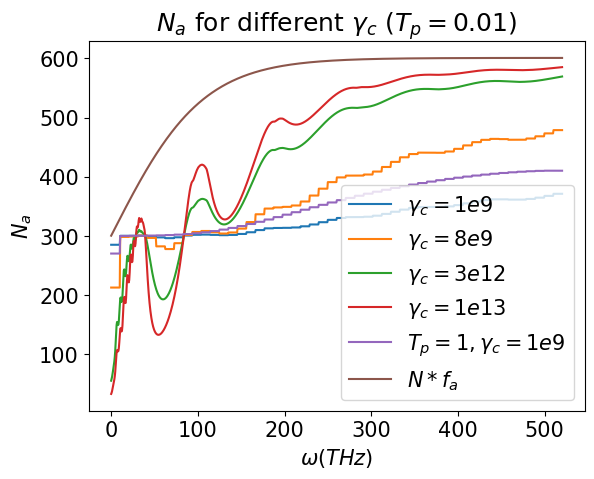

In [31]:
plt.plot(omega_n, na_t001_1_e, label = '$\gamma_c=1e9$')
plt.plot(omega_n, na_t001_2_e, label = '$\gamma_c=8e9$')
plt.plot(omega_n, na_t001_3, label = '$\gamma_c=3e12$')
plt.plot(omega_n, na_t001_4, label = '$\gamma_c=1e13$')
plt.plot(omega_n, na_t1_1_e, label = '$T_p = 1, \gamma_c=1e9$')
plt.plot(omega_n, N*fan, label = '$N*f_a$')
plt.legend()
plt.xlabel('$\omega(THz)$')
plt.ylabel('$N_a$')
plt.title('$N_a$ for different $\gamma_c$ ($T_p=0.01$)')
#plt.savefig('Na_tp001_gc_change.png')

### $S_{in}$ and $S_{out}$

Load the data and compute signal strength $S_{in}$ and $S_{out}$

In [53]:
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp1_v4.npz','Photon_n_0_6pi_Tp1_n50_kry_sp.npz')
s_in_t1_gc1e9, s_out_t1_gc1e9 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp1_v4.npz','Photon_n_0_6pi_Tp1_n1000_rec.npz')
s_in_t1, s_out_t1 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp1_v4.npz','Photon_n_0_6pi_Tp1_n1000_gr1e+10_gc3e+12.npz')
s_in_t1_gc3e12, s_out_t1_gc3e12 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp04_v4.npz','Photon_n_0_6pi_Tp0.4_n1000_gr1e+10_gc1e+13.npz')
s_in_t04_gc1e13, s_out_t04_gc1e13 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp04_v4.npz','Photon_n_0_6pi_Tp0.4_n1000_gr1e+10_gc5e+12.npz')
s_in_t04_gc5e12, s_out_t04_gc5e12 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp04_v4.npz','Photon_n_0_6pi_Tp0.4_n1000_gr1e+10_gc3e+12.npz')
s_in_t04_gc3e12, s_out_t04_gc3e12 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)

(0.0, 30.0)

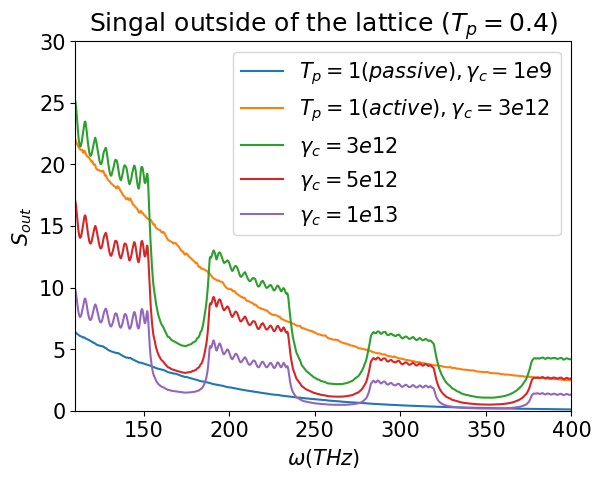

In [54]:
plt.plot(omega_l,s_out_t1, label='$T_p=1(passive), \gamma_c=1e9$')
#plt.plot(omega_l,s_out_t1_gc1e9, label='$T_p=1, \gamma_c=1e9$')
#plt.plot(omega_l,s_out_t001_gc1e9, label='$\gamma_c=1e9$')
#plt.plot(omega_l,s_out_t001_gc4e9, label='$\gamma_c=4e9$')
plt.plot(omega_l,s_out_t1_gc3e12, label='$T_p=1(active), \gamma_c=3e12$')
plt.plot(omega_l,s_out_t04_gc3e12, label='$\gamma_c=3e12$')
plt.plot(omega_l,s_out_t04_gc5e12, label='$\gamma_c=5e12$')
plt.plot(omega_l,s_out_t04_gc1e13, label='$\gamma_c=1e13$')
plt.xlabel('$\omega(THz)$')
plt.ylabel('$S_{out}$')
plt.title('Singal outside of the lattice ($T_p = 0.4$)')
plt.legend()
plt.xlim(110,400)
plt.ylim(0,30)
#plt.savefig('Sout_Tp04_n1000_gc_change.png')

(0.0, 90.0)

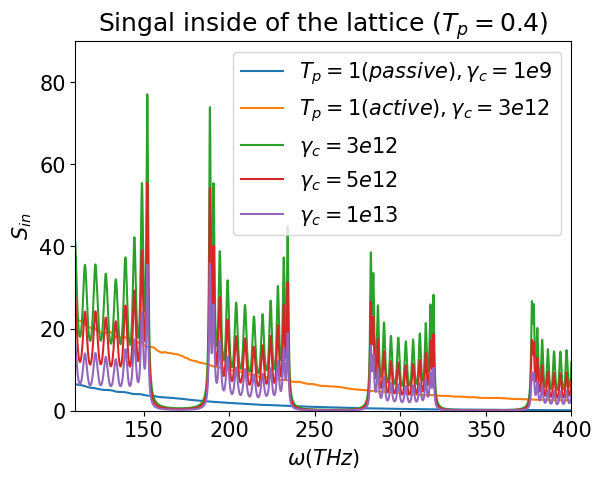

In [55]:
plt.plot(omega_l,s_in_t1, label='$T_p=1(passive), \gamma_c=1e9$')
#plt.plot(omega_l,s_out_t1_gc1e9, label='$T_p=1, \gamma_c=1e9$')
#plt.plot(omega_l,s_out_t001_gc1e9, label='$\gamma_c=1e9$')
#plt.plot(omega_l,s_out_t001_gc4e9, label='$\gamma_c=4e9$')
plt.plot(omega_l,s_in_t1_gc3e12, label='$T_p=1(active), \gamma_c=3e12$')
plt.plot(omega_l,s_in_t04_gc3e12, label='$\gamma_c=3e12$')
plt.plot(omega_l,s_in_t04_gc5e12, label='$\gamma_c=5e12$')
plt.plot(omega_l,s_in_t04_gc1e13, label='$\gamma_c=1e13$')
plt.xlabel('$\omega(THz)$')
plt.ylabel('$S_{in}$')
plt.title('Singal inside of the lattice ($T_p = 0.4$)')
plt.legend()
plt.xlim(110,400)
plt.ylim(0,90)
#plt.savefig('Sin_Tp04_n1000_gc_change.png')

In [96]:
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp1_v4.npz','Photon_n_0_6pi_Tp1_n50_kry_sp.npz')
s_in_t1_gc1e9, s_out_t1_gc1e9 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp1_v4.npz','Photon_n_0_6pi_Tp1_n1000_rec.npz')
s_in_t1, s_out_t1 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp1_v4.npz','Photon_n_0_6pi_Tp1_n1000_gr1e+10_gc3e+12.npz')
s_in_t1_gc3e12, s_out_t1_gc3e12 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp001_v4.npz','Photon_n_0_6pi_Tp001_n50_kry_sp_gc1e+09.npz')
s_in_t001_gc1e9, s_out_t001_gc1e9 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp001_v4.npz','Photon_n_0_6pi_Tp001_n50_kry_sp_gc4e+09.npz')
s_in_t001_gc4e9, s_out_t001_gc4e9 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp001_v4.npz','Photon_n_0_6pi_Tp0.01_n1000_gr1e+10_gc1e+13.npz')
s_in_t001_gc1e13, s_out_t001_gc1e13 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp001_v4.npz','Photon_n_0_6pi_Tp0.01_n1000_gr1e+10_gc5e+12.npz')
s_in_t001_gc5e12, s_out_t001_gc5e12 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp001_v4.npz','Photon_n_0_6pi_Tp0.01_n1000_gr1e+10_gc3e+12.npz')
s_in_t001_gc3e12, s_out_t001_gc3e12 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)

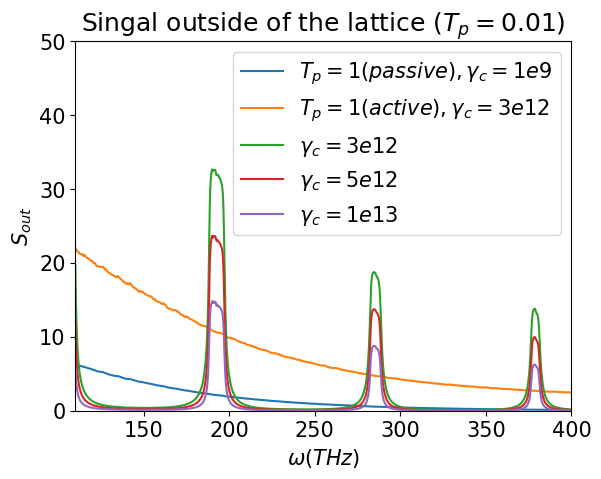

In [97]:
plt.plot(omega_l,s_out_t1, label='$T_p=1(passive), \gamma_c=1e9$')
#plt.plot(omega_l,s_out_t1_gc1e9, label='$T_p=1, \gamma_c=1e9$')
#plt.plot(omega_l,s_out_t001_gc1e9, label='$\gamma_c=1e9$')
#plt.plot(omega_l,s_out_t001_gc4e9, label='$\gamma_c=4e9$')
plt.plot(omega_l,s_out_t1_gc3e12, label='$T_p=1(active), \gamma_c=3e12$')
plt.plot(omega_l,s_out_t001_gc3e12, label='$\gamma_c=3e12$')
plt.plot(omega_l,s_out_t001_gc5e12, label='$\gamma_c=5e12$')
plt.plot(omega_l,s_out_t001_gc1e13, label='$\gamma_c=1e13$')
plt.xlabel('$\omega(THz)$')
plt.ylabel('$S_{out}$')
plt.title('Singal outside of the lattice ($T_p = 0.01$)')
plt.legend()
plt.xlim(110,400)
plt.ylim(0,50)
plt.savefig('Sout_Tp001_n1000_gc_change.png')

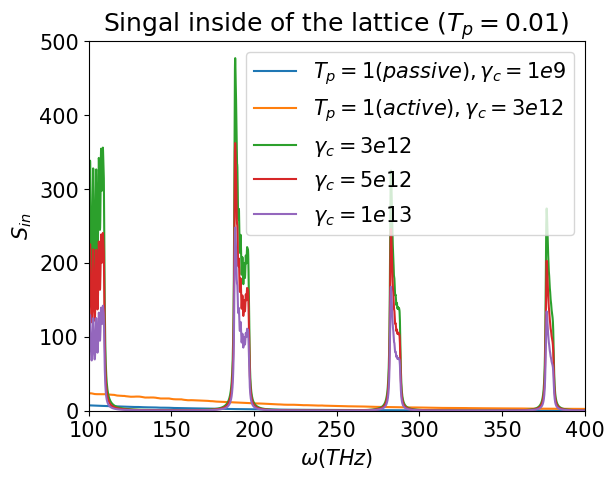

In [98]:
plt.plot(omega_l,s_in_t1, label='$T_p=1(passive), \gamma_c=1e9$')
#plt.plot(omega_l,s_out_t1_gc1e9, label='$T_p=1, \gamma_c=1e9$')
#plt.plot(omega_l,s_out_t001_gc1e9, label='$\gamma_c=1e9$')
#plt.plot(omega_l,s_out_t001_gc4e9, label='$\gamma_c=4e9$')
plt.plot(omega_l,s_in_t1_gc3e12, label='$T_p=1(active), \gamma_c=3e12$')
plt.plot(omega_l,s_in_t001_gc3e12, label='$\gamma_c=3e12$')
plt.plot(omega_l,s_in_t001_gc5e12, label='$\gamma_c=5e12$')
plt.plot(omega_l,s_in_t001_gc1e13, label='$\gamma_c=1e13$')
plt.xlabel('$\omega(THz)$')
plt.ylabel('$S_{in}$')
plt.title('Singal inside of the lattice ($T_p = 0.01$)')
plt.legend()
plt.xlim(100,400)
plt.ylim(0,500)
plt.savefig('Sin_Tp001_n1000_gc_change.png')

In [50]:
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp1_v4.npz','Photon_n_0_6pi_Tp1_n50_kry_sp_gc4e+09.npz')
s_in_t1_gc4e9, s_out_t1_gc4e9 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp1_v4.npz','Photon_n_0_6pi_Tp1_n50_kry_sp_gc2e+09.npz')
s_in_t1_gc2e9, s_out_t1_gc2e9 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp1_v4.npz','Photon_n_0_6pi_Tp1_n50_kry_sp.npz')
s_in_t1_gc1e9, s_out_t1_gc1e9 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp001_v4.npz','Photon_n_0_6pi_Tp001_n50_kry_sp_gc1e+09.npz')
s_in_t001_gc1e9, s_out_t001_gc1e9 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp001_v4.npz','Photon_n_0_6pi_Tp001_n50_kry_sp_gc2e+09.npz')
s_in_t001_gc2e9, s_out_t001_gc2e9 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp001_v4.npz','Photon_n_0_6pi_Tp001_n50_kry_sp_gc4e+09.npz')
s_in_t001_gc4e9, s_out_t001_gc4e9 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)

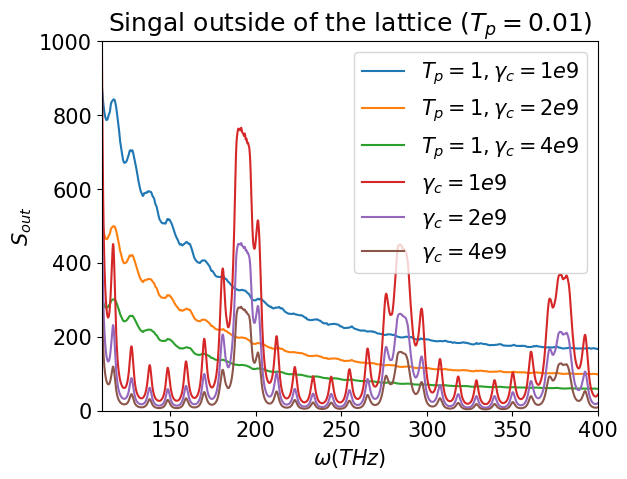

In [51]:
plt.plot(omega_l,s_out_t1_gc1e9, label='$T_p=1, \gamma_c=1e9$')
plt.plot(omega_l,s_out_t1_gc2e9, label='$T_p=1, \gamma_c=2e9$')
plt.plot(omega_l,s_out_t1_gc4e9, label='$T_p=1, \gamma_c=4e9$')
plt.plot(omega_l,s_out_t001_gc1e9, label='$\gamma_c=1e9$')
plt.plot(omega_l,s_out_t001_gc2e9, label='$\gamma_c=2e9$')
plt.plot(omega_l,s_out_t001_gc4e9, label='$\gamma_c=4e9$')
plt.xlabel('$\omega(THz)$')
plt.ylabel('$S_{out}$')
plt.title('Singal outside of the lattice ($T_p = 0.01$)')
plt.legend()
plt.xlim(110,400)
plt.ylim(0,1000)
plt.savefig('S_out_n50_tp001_sp_gc_change_v3.png')

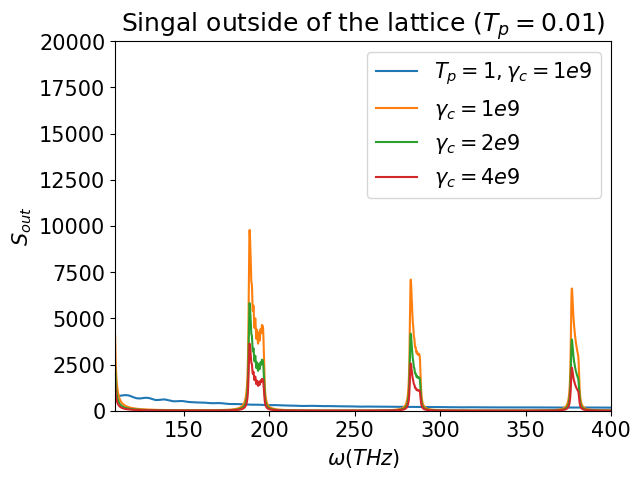

In [47]:
plt.plot(omega_l,s_in_t1, label='$T_p=1, \gamma_c=1e9$')
plt.plot(omega_l,s_in_t001_gc1e9, label='$\gamma_c=1e9$')
plt.plot(omega_l,s_in_t001_gc2e9, label='$\gamma_c=2e9$')
plt.plot(omega_l,s_in_t001_gc4e9, label='$\gamma_c=4e9$')
plt.xlabel('$\omega(THz)$')
plt.ylabel('$S_{out}$')
plt.title('Singal outside of the lattice ($T_p = 0.01$)')
plt.legend()
plt.xlim(110,400)
plt.ylim(0,20000)
plt.savefig('S_in_n50_tp001_sp_gc_change.png')

## $\gamma_c$ and L dependence (passive case)

In [173]:
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp001_v4.npz','Photon_n_0_6pi_Tp001_n1000_rec.npz')
s_in_t001_gc1e9, s_out_t001_gc1e9 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp001_v4.npz','Photon_n_0_6pi_Tp001_n1000_gc5e9_rec.npz')
s_in_t001_gc5e9, s_out_t001_gc5e9 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp001_v4.npz','Photon_n_0_6pi_Tp001_n1000_gc1e10_rec.npz')
s_in_t001_gc1e10, s_out_t001_gc1e10 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp001_v4.npz','Photon_n_0_6pi_Tp001_n1000_gc5e10_rec.npz')
s_in_t001_gc5e10, s_out_t001_gc5e10 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp001_v4.npz','Photon_n_0_6pi_Tp001_n1000_gc1e11_rec.npz')
s_in_t001_gc1e11, s_out_t001_gc1e11 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp001_v4.npz','Photon_n_0_6pi_Tp001_n1000_gc5e11_rec.npz')
s_in_t001_gc5e11, s_out_t001_gc5e11 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp001_v4.npz','Photon_n_0_6pi_Tp001_n1000_gc1e12_rec.npz')
s_in_t001_gc1e12, s_out_t001_gc1e12 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp001_v4.npz','Photon_n_0_6pi_Tp001_n1000_gc5e12_rec.npz')
s_in_t001_gc5e12, s_out_t001_gc5e12 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp001_v4.npz','Photon_n_0_6pi_Tp0.01_n1000_gc1e+13.npz')
s_in_t001_gc1e13, s_out_t001_gc1e13 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp001_v4.npz','Photon_n_0_6pi_Tp0.01_n1000_gc5e+13.npz')
s_in_t001_gc5e13, s_out_t001_gc5e13 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)

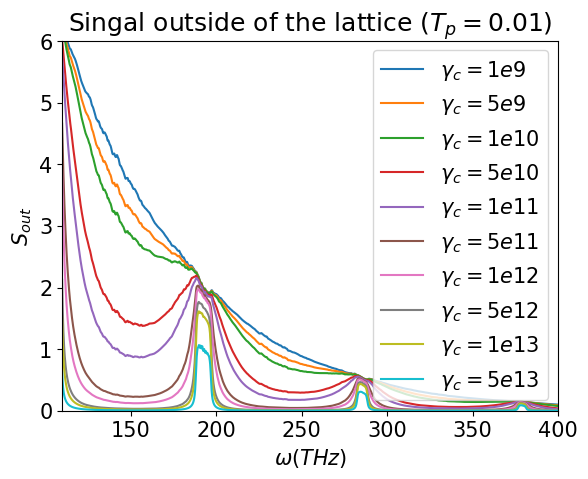

In [181]:
plt.plot(omega_l,s_out_t001_gc1e9, label='$\gamma_c=1e9$')
plt.plot(omega_l,s_out_t001_gc5e9, label='$\gamma_c=5e9$')
plt.plot(omega_l,s_out_t001_gc1e10, label='$\gamma_c=1e10$')
plt.plot(omega_l,s_out_t001_gc5e10, label='$\gamma_c=5e10$')
plt.plot(omega_l,s_out_t001_gc1e11, label='$\gamma_c=1e11$')
plt.plot(omega_l,s_out_t001_gc5e11, label='$\gamma_c=5e11$')
plt.plot(omega_l,s_out_t001_gc1e12, label='$\gamma_c=1e12$')
plt.plot(omega_l,s_out_t001_gc5e12, label='$\gamma_c=5e12$')
plt.plot(omega_l,s_out_t001_gc1e13, label='$\gamma_c=1e13$')
plt.plot(omega_l,s_out_t001_gc5e13, label='$\gamma_c=5e13$')
plt.xlabel('$\omega(THz)$')
plt.ylabel('$S_{out}$')
plt.title('Singal outside of the lattice ($T_p = 0.01$)')
plt.legend()
plt.xlim(110,400)
plt.ylim(0,6)
plt.savefig('S_in_n1000_tp001_gc_change.png')

In [705]:
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp1_L10_v1.npz','Photon_n_0_6pi_Tp1_n1000_L10_rec.npz')
s_in_t1, s_out_t1 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp01_L10_v1.npz','Photon_n_0_6pi_Tp01_n1000_L10_rec.npz')
s_in_t01, s_out_t01 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp001_L10_v1.npz','Photon_n_0_6pi_Tp001_n1000_L10_rec.npz')
s_in_t001, s_out_t001 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)

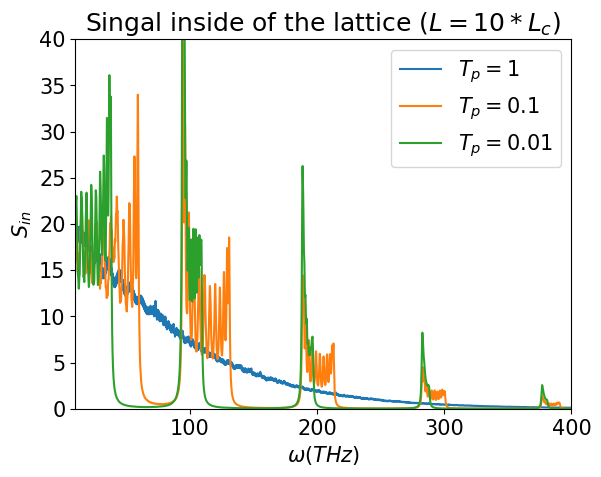

In [706]:
plt.plot(omega_l,s_in_t1, label='$T_p=1$')
plt.plot(omega_l,s_in_t01, label='$T_p=0.1$')
plt.plot(omega_l,s_in_t001, label='$T_p=0.01$')
plt.xlabel('$\omega(THz)$')
plt.ylabel('$S_{in}$')
plt.title('Singal inside of the lattice ($L=10*L_c$)')
plt.legend()
plt.xlim(10,400)
plt.ylim(0,40)
plt.savefig('S_in_n1000_mix_L10_v2.png')

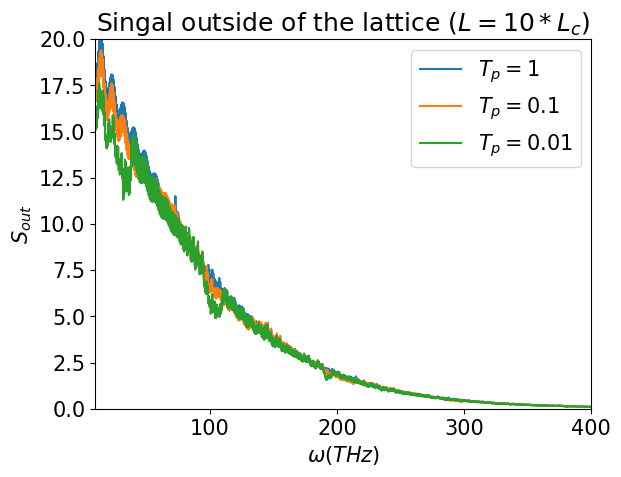

In [708]:
plt.plot(omega_l,s_out_t1, label='$T_p=1$')
plt.plot(omega_l,s_out_t01, label='$T_p=0.1$')
plt.plot(omega_l,s_out_t001, label='$T_p=0.01$')
plt.xlabel('$\omega(THz)$')
plt.ylabel('$S_{out}$')
plt.title('Singal outside of the lattice ($L=10*L_c$)')
plt.legend()
plt.xlim(10,400)
plt.ylim(0,20)
plt.savefig('S_out_n1000_mix_L10_v2.png')

## General studies

In [656]:
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp1_v4.npz','Photon_n_0_6pi_Tp1_n500_kry.npz')
s_in_t1, s_out_t1 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp001_v4.npz','Photon_n_0_6pi_Tp001_n500_kry.npz')
s_in_t001, s_out_t001 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)

(0.0, 25.0)

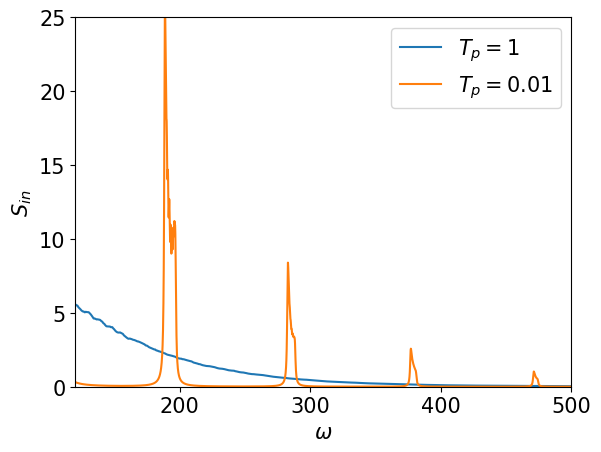

In [48]:
plt.plot(omega_l,s_in_t1, label='$T_p=1$')
plt.plot(omega_l,s_in_t001, label='$T_p=0.01$')
plt.xlabel('$\omega$')
plt.ylabel('$S_{in}$')
plt.legend()
plt.xlim(120,500)
plt.ylim(0,25)

(120.0, 500.0)

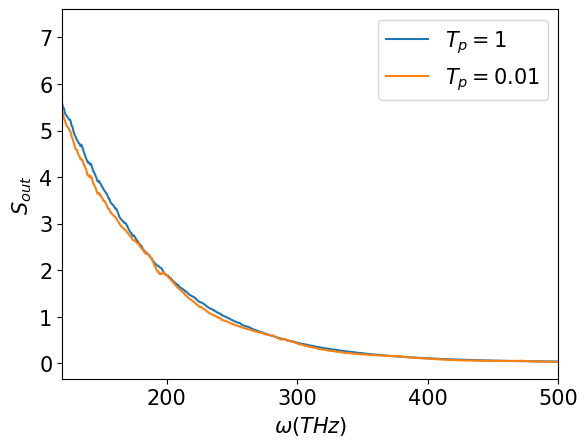

In [50]:
plt.plot(omega_l,s_out_t1, label='$T_p=1$')
plt.plot(omega_l,s_out_t001, label='$T_p=0.01$')
plt.xlabel('$\omega(THz)$')
plt.ylabel('$S_{out}$')
plt.legend()
plt.xlim(120,500)
#plt.xlim(275,295)
#plt.ylim(45,80)

(275.0, 295.0)

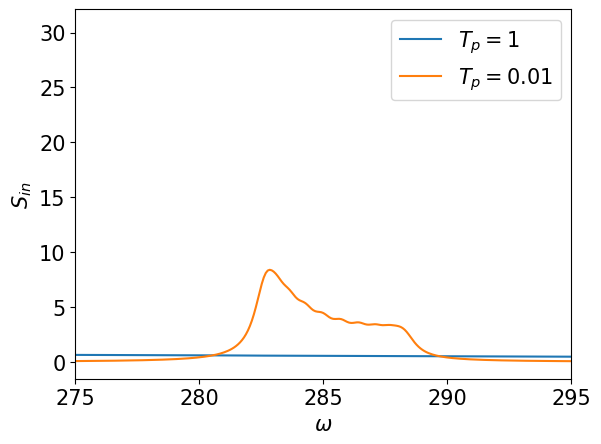

In [87]:
plt.plot(omega_l,s_in_t1, label='$T_p=1$')
plt.plot(omega_l,s_in_t001, label='$T_p=0.01$')
plt.xlabel('$\omega$')
plt.ylabel('$S_{in}$')
plt.legend()
plt.xlim(275,295)

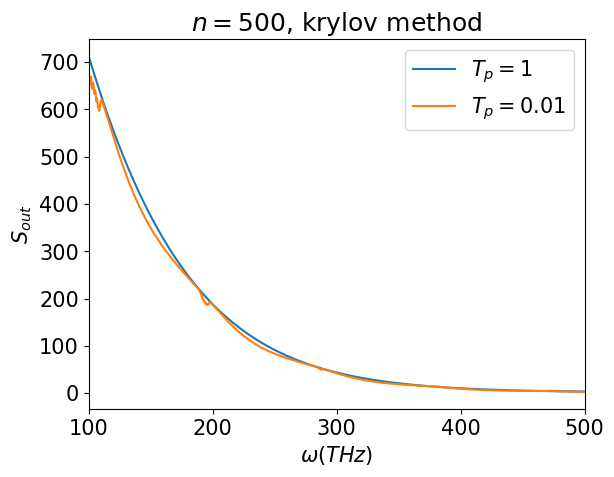

In [135]:
plt.title("$n=500$, krylov method")
plt.plot(omega_l,s_out_t1, label='$T_p=1$')
plt.plot(omega_l,s_out_t001, label='$T_p=0.01$')
plt.xlabel('$\omega(THz)$')
plt.ylabel('$S_{out}$')
plt.legend()
plt.xlim(100,500)
plt.savefig("Sout_Tp001_n500_kry.png")

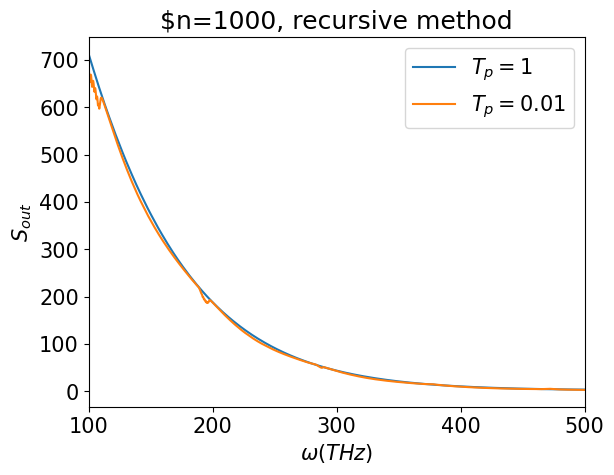

In [95]:
plt.title("$n=1000, recursive method")
plt.plot(omega_l,s_out_t1, label='$T_p=1$')
plt.plot(omega_l,s_out_t001, label='$T_p=0.01$')
plt.xlabel('$\omega(THz)$')
plt.ylabel('$S_{out}$')
plt.legend()
plt.xlim(100,500)
#plt.ylim(45,80)
plt.savefig("Sout_Tp001_n1000_rec.png")

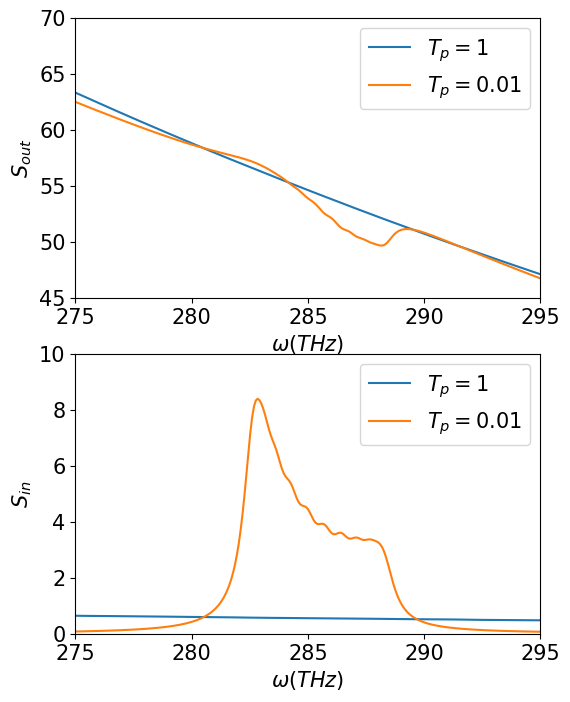

In [120]:
plt.figure(figsize=(6,8))
plt.subplot(211)
plt.plot(omega_l,s_out_t1, label='$T_p=1$')
plt.plot(omega_l,s_out_t001, label='$T_p=0.01$')
plt.xlabel('$\omega(THz)$')
plt.ylabel('$S_{out}$')
plt.legend()
plt.xlim(275,295)
plt.ylim(45,70)
plt.subplot(212)
plt.plot(omega_l,s_in_t1, label='$T_p=1$')
plt.plot(omega_l,s_in_t001, label='$T_p=0.01$')
plt.xlabel('$\omega(THz)$')
plt.ylabel('$S_{in}$')
plt.legend()
plt.xlim(275,295)
plt.ylim(0,10)
plt.savefig("Sout_Tp001_n1000_275_295.png")

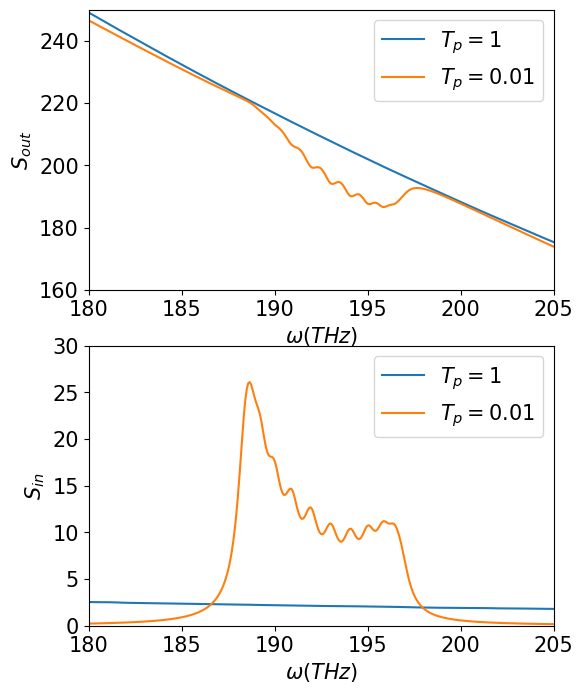

In [124]:
plt.figure(figsize=(6,8))
plt.subplot(211)
plt.plot(omega_l,s_out_t1, label='$T_p=1$')
plt.plot(omega_l,s_out_t001, label='$T_p=0.01$')
plt.xlabel('$\omega(THz)$')
plt.ylabel('$S_{out}$')
plt.legend()
plt.xlim(180,205)
plt.ylim(160,250)
plt.subplot(212)
plt.plot(omega_l,s_in_t1, label='$T_p=1$')
plt.plot(omega_l,s_in_t001, label='$T_p=0.01$')
plt.xlabel('$\omega(THz)$')
plt.ylabel('$S_{in}$')
plt.legend()
plt.xlim(180,205)
plt.ylim(0,30)
plt.savefig("Sout_Tp001_n1000_180_205.png")

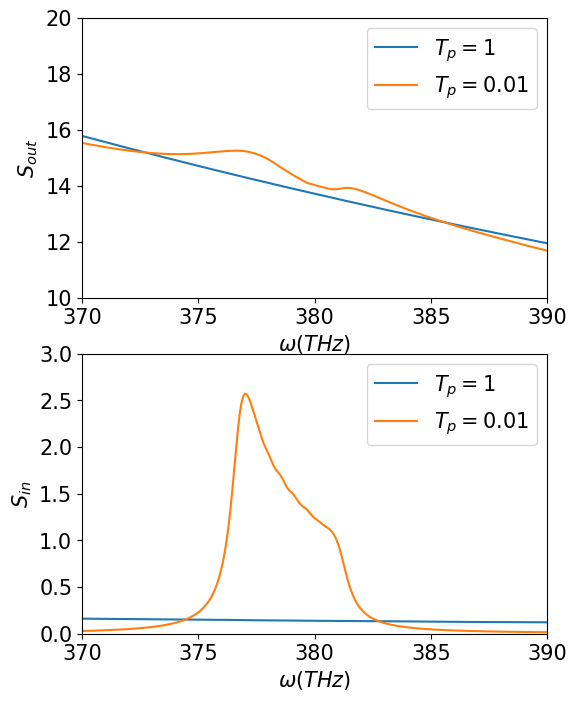

In [132]:
plt.figure(figsize=(6,8))
plt.subplot(211)
plt.plot(omega_l,s_out_t1, label='$T_p=1$')
plt.plot(omega_l,s_out_t001, label='$T_p=0.01$')
plt.xlabel('$\omega(THz)$')
plt.ylabel('$S_{out}$')
plt.legend()
plt.xlim(370,390)
plt.ylim(10,20)
plt.subplot(212)
plt.plot(omega_l,s_in_t1, label='$T_p=1$')
plt.plot(omega_l,s_in_t001, label='$T_p=0.01$')
plt.xlabel('$\omega(THz)$')
plt.ylabel('$S_{in}$')
plt.legend()
plt.xlim(370,390)
plt.ylim(0,3)
plt.savefig("Sout_Tp001_n1000_370_390.png")

(145.0, 300.0)

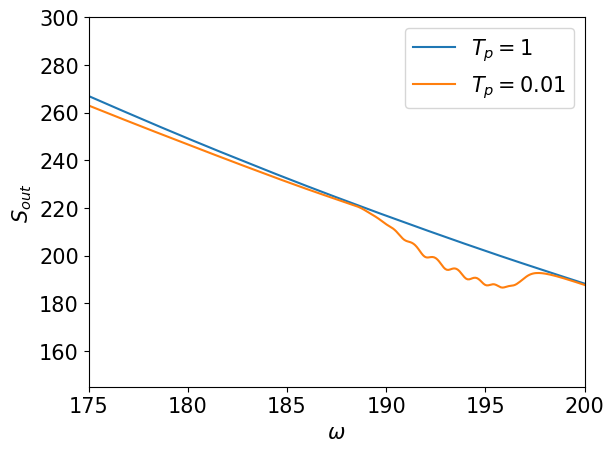

In [67]:
plt.plot(omega_l,s_out_t1, label='$T_p=1$')
plt.plot(omega_l,s_out_t001, label='$T_p=0.01$')
plt.xlabel('$\omega$')
plt.ylabel('$S_{out}$')
plt.legend()
plt.xlim(175,200)
plt.ylim(145,300)

In [59]:
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp1_v4.npz','Photon_n_0_6pi_Tp1_n50_kry_sp.npz')
s_in_t1, s_out_t1 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp01_v4.npz','Photon_n_0_6pi_Tp01_n50_kry_sp.npz')
s_in_t01, s_out_t01 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp001_v4.npz','Photon_n_0_6pi_Tp001_n50_kry_sp.npz')
s_in_t001, s_out_t001 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)

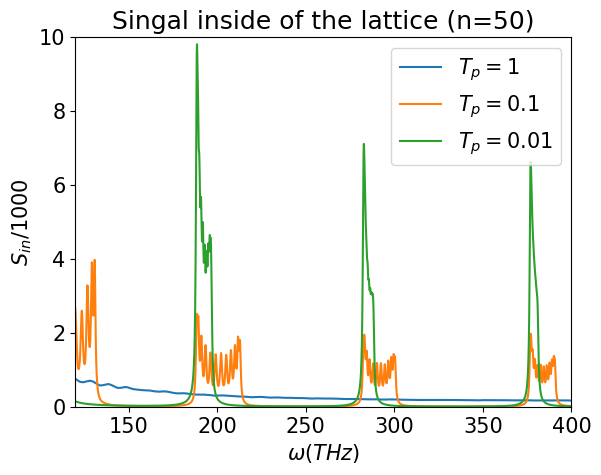

In [60]:
plt.plot(omega_l,s_in_t1/1000, label='$T_p=1$')
plt.plot(omega_l,s_in_t01/1000, label='$T_p=0.1$')
plt.plot(omega_l,s_in_t001/1000, label='$T_p=0.01$')
plt.xlabel('$\omega(THz)$')
plt.ylabel('$S_{in}/1000$')
plt.title('Singal inside of the lattice (n=50)')
plt.legend()
plt.xlim(120,400)
plt.ylim(0,10)
plt.savefig('S_in_n50_mix_sp_2.png')

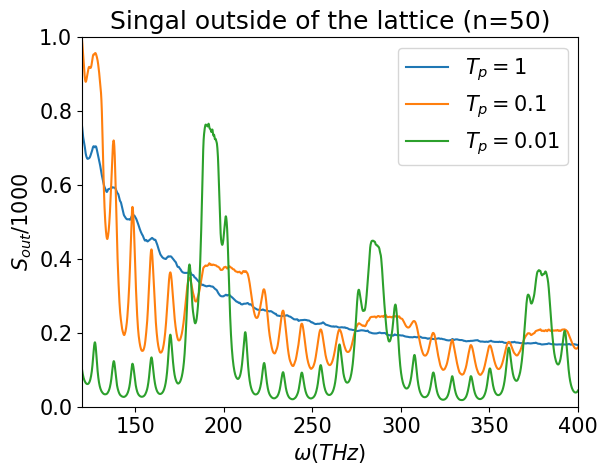

In [62]:
plt.plot(omega_l,s_out_t1/1000, label='$T_p=1$')
plt.plot(omega_l,s_out_t01/1000, label='$T_p=0.1$')
plt.plot(omega_l,s_out_t001/1000, label='$T_p=0.01$')
plt.xlabel('$\omega(THz)$')
plt.ylabel('$S_{out}/1000$')
plt.title('Singal outside of the lattice (n=50)')
plt.legend()
plt.xlim(120,400)
plt.ylim(0,1)
plt.savefig('S_out_n50_mix_sp_2.png')

## Time Dependent Investigation

In [13]:
omega_l = np.linspace(1e14,5e14,500)/gamma
def Swk_gen(omega_l, Omega_k, G_in):
    nw = len(Omega_k)
    Swk = []
    for omega in omega_l:
        Swk.append(Omega_k*G_in*gamma_d/(gamma_d**2 + (omega*np.ones(nw) - Omega_k)**2))
    return np.array(Swk)

In [14]:
def S_io(omega_l, Omega_k, G_in, G_out, Nk):
    s_in = []
    s_out = []
    Swk_in = Swk_gen(omega_l, Omega_k, G_in)
    Swk_out = Swk_gen(omega_l, Omega_k, G_out)
    for i, omega in enumerate(omega_l):
        s_in.append(np.sum(Swk_in[i]*Nk))
    for i, omega in enumerate(omega_l):
        s_out.append(np.sum(Swk_out[i]*Nk))
    return np.array(s_in), np.array(s_out)                    

In [15]:
def Nk_load_t(emode_f, photon_f, i=-1):
    emodes = np.load(emode_f)
    ks = emodes["ks"]
    G_in = emodes["G_in"]
    G_out = emodes["G_out"]
    G_out_ep = emodes["G_out_ep"]
    Omega_k = ks/lp*c0/gamma
    nit = np.load(photon_f)
    Nkt = nit[nit.files[2]]
    if Nkt.ndim != 1:
        Nk = Nkt[i]
    return Omega_k, G_in, G_out, G_out_ep, Nk

In [47]:
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp1_v4.npz','Photon_n_0_6pi_Tp1_n500_kry.npz')
s_in_t1, s_out_t1 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load('Emodes_0_6pi_Tp001_v4.npz','Photon_n_0_6pi_Tp001_n500_kry.npz')
s_in_t001, s_out_t001 = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)

In [36]:
nit = np.load('Photon_n_0_6pi_Tp04_n500_t1e-9.npz')
tt = len(nit['t'])
s_in_t04 = []
s_out_t04 = []
for i in tqdm(range(tt)):
    Omega_k, G_in, G_out, G_out_ep, Nk = Nk_load_t('Emodes_0_6pi_Tp04_v4.npz','Photon_n_0_6pi_Tp04_n500_t1e-9.npz',i)
    s_in, s_out = S_io(omega_l, Omega_k, G_in, G_out_ep, Nk)
    s_in_t04.append(s_in)
    s_out_t04.append(s_out)
s_in_t04 = np.array(s_in_t04)
s_out_t04 = np.array(s_out_t04)

  0%|          | 0/844 [00:00<?, ?it/s]

In [26]:
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib import cm
import matplotlib
matplotlib.rcParams['animation.embed_limit']=100

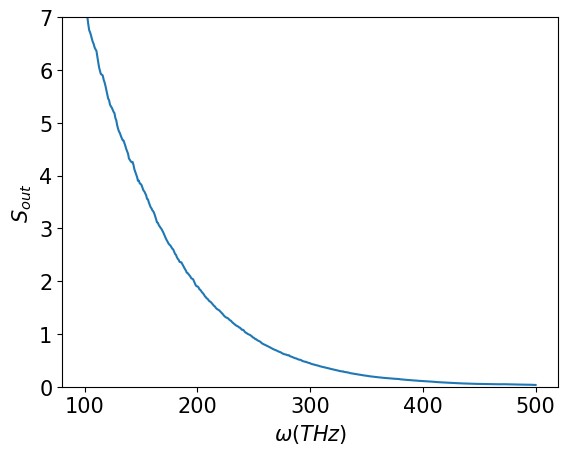

In [37]:
fig, ax = plt.subplots()

ax.set_ylim(0,7)
ax.set_xlabel('$\omega(THz)$')
ax.set_ylabel('$S_{out}$')
line, = ax.plot(omega_l, s_out_t04[0])

def animate(i):
    line.set_ydata(s_out_t04[i])  # update the data.
    return line,

ani = animation.FuncAnimation(
    fig, animate, interval=30, blit=True, save_count=len(s_out_t04))

HTML(ani.to_jshtml())
FFwriter = animation.FFMpegWriter(fps=10)
ani.save('s_out_tp04_ani.mp4', writer = FFwriter)

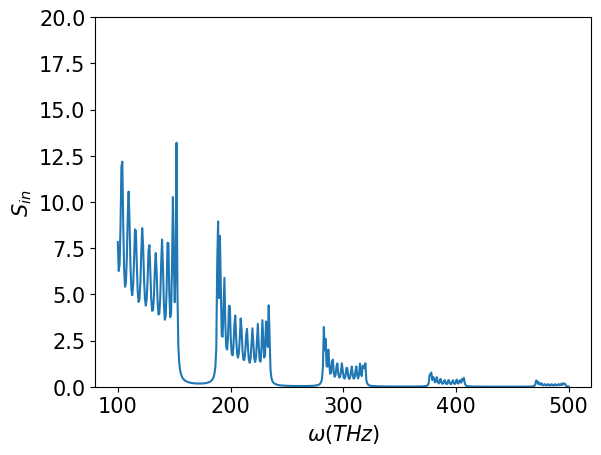

In [38]:
fig, ax = plt.subplots()

ax.set_ylim(0,20)
ax.set_xlabel('$\omega(THz)$')
ax.set_ylabel('$S_{in}$')
line, = ax.plot(omega_l, s_in_t04[0])

def animate(i):
    line.set_ydata(s_in_t04[i])  # update the data.
    return line,

ani = animation.FuncAnimation(
    fig, animate, interval=30, blit=True, save_count=len(s_in_t04))

HTML(ani.to_jshtml())
FFwriter = animation.FFMpegWriter(fps=10)
ani.save('s_in_tp04_ani.mp4', writer = FFwriter)